In [678]:
# Imports and global variables

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

round_digit = 4

# Preprocessing the Data

In [679]:
# Read input data from csv file

df = pd.read_csv('input.csv')
print(df.head(5))

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [680]:
# Randomize and split data

df = df.sample(frac=1)
split = int (0.8*len(df))

train_X = df[:split]['Fuel Consumption Comb (mpg)']
train_Y = df[:split]['CO2 Emissions(g/km)']

test_X = df[split:]['Fuel Consumption Comb (mpg)']
test_Y = df[split:]['CO2 Emissions(g/km)']

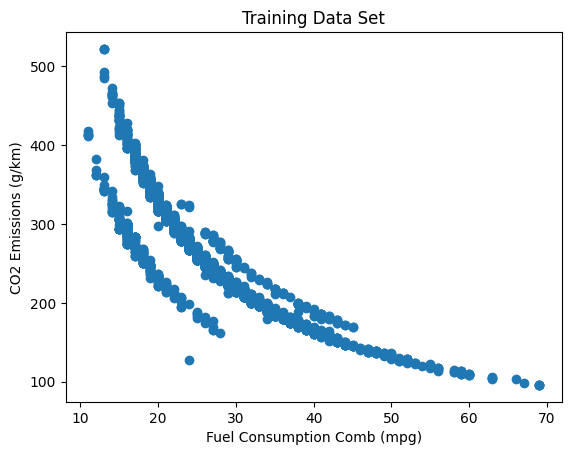

In [681]:
# Plot training data

plt.title("Training Data Set")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.scatter(train_X, train_Y)

# Training the Model

In [682]:
# Function to find optimal line of best fit for a given dataset

def linear_regression(X: np.array, Y: np.array) -> np.array:
    n = len(X)
    
    numerator = np.sum(X * Y) - ((np.sum(Y) * np.sum(X)) / n)
    denominator = np.sum(X ** 2) - ((np.sum(X) ** 2) / n)
    
    coef = numerator / denominator
    
    intercept = (np.sum(Y) / n) - coef * (np.sum(X) / n)
    
    return intercept, coef

# Evaluate the Model

In [683]:
# Function to calculate the Mean Absolute Error of a model

def mae(X:np.array, Y:np.array, func) -> float:
    total = sum(abs(func(X)-Y))
    return total / len(X)

# Original Data

In [684]:
# Fit a linear regression model on the original CO2 dataset

b_0, b_1 = linear_regression(train_X, train_Y)
model = lambda x: b_1 * x + b_0
mae_original = mae(train_X, train_Y, model)

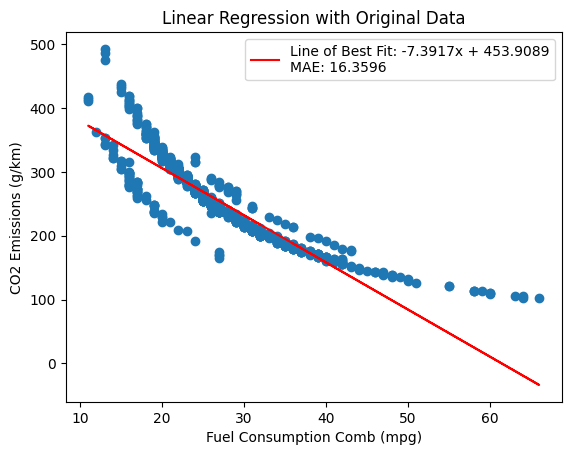

In [685]:
# Plot original linear regression model

plt.title("Linear Regression with Original Data")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.plot(test_X, model(test_X), label='Line of Best Fit: ' + str(round(b_1, round_digit)) + 'x + ' + str(round(b_0, round_digit)) + '\nMAE: ' + str(round(mae_original, round_digit)), color='red')
plt.scatter(test_X, test_Y)

plt.legend()

# Normalize Data

In [686]:
# Function to normalize a data vector

def normalize(data: np.array) -> np.array:
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [687]:
# Normalize the original data

norm_train_X = normalize(train_X)
norm_train_Y = normalize(train_Y)

norm_test_X = normalize(test_X)
norm_test_Y = normalize(test_Y)

In [688]:
# Fit a linear regression model on the normalized CO2 dataset

norm_b_0, norm_b_1 = linear_regression(norm_train_X, norm_train_Y)
model_norm = lambda x: norm_b_1 * x + norm_b_0
mae_norm = mae(norm_test_X, norm_test_Y, model_norm)

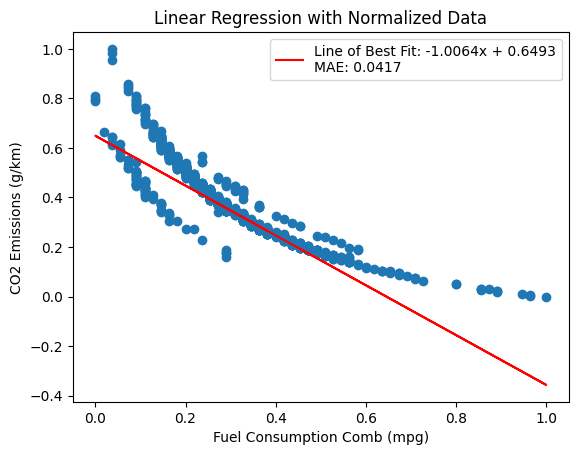

In [689]:
# Plot normalized linear regression model

plt.title("Linear Regression with Normalized Data")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.plot(norm_test_X, model_norm(norm_test_X), label='Line of Best Fit: ' + str(round(norm_b_1, round_digit)) + 'x + ' + str(round(norm_b_0, round_digit)) + '\nMAE: ' + str(round(mae_norm, round_digit)), color='red')
plt.scatter(norm_test_X, norm_test_Y)

plt.legend()

# Standardize Data

In [690]:
# Function to standardize a data vector

def standardize(data: np.array) -> np.array:
    return (data - np.mean(data)) / (np.std(data))

In [691]:
# Standardize the original data 

std_train_X = standardize(train_X)
std_train_Y = standardize(train_Y)

std_test_X = standardize(test_X)
std_test_Y = standardize(test_Y)

In [692]:
# Fit a linear regression model on the standardized CO2 dataset

std_b_0, std_b_1 = linear_regression(std_train_X, std_train_Y)
model_std = lambda x: std_b_1 * x + std_b_0
mae_std = mae(std_test_X, std_test_Y, model_std)

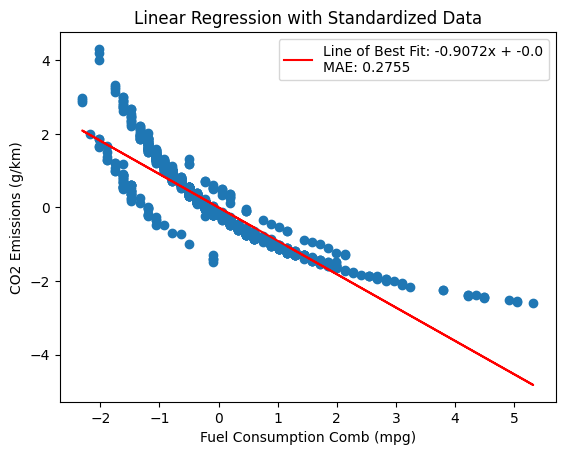

In [693]:
# Plot standardized linear regression model

plt.title("Linear Regression with Standardized Data")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.plot(std_test_X, model_std(std_test_X), label='Line of Best Fit: ' + str(round(std_b_1, round_digit)) + 'x + ' + str(round(std_b_0, round_digit)) + '\nMAE: ' + str(round(mae_std, round_digit)), color='red')
plt.scatter(std_test_X, std_test_Y)

plt.legend()

# Polynomial Regression

In [694]:
# Fit a polynomial regression model on the original CO2 dataset

coef_poly = np.polyfit(train_X, train_Y, 2)
model_poly = lambda x: np.polyval(coef_poly, x) 
mae_poly = mae(test_X, test_Y, model_poly)

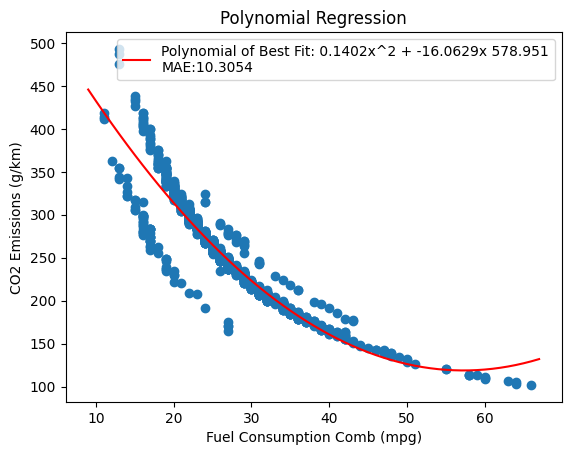

In [695]:
# Plot polynomial regression model

plt.title("Polynomial Regression")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.scatter(test_X, test_Y)

plot_X = range(min(test_X) - 2, max(test_X) + 2, 1)
plt.plot(plot_X, model_poly(plot_X), label='Polynomial of Best Fit: ' + str(round(coef_poly[0], round_digit)) + 'x^2 + ' + str(round(coef_poly[1], round_digit)) + 'x ' + str(round(coef_poly[2], 3)) + '\nMAE:' + str(round(mae_poly, round_digit)), color='red')

plt.legend()

In [696]:
# Fit a logarithmic regression model on the original CO2 dataset

coef_log = np.polyfit(np.log(train_X), train_Y, 1)
model_log = lambda x: coef_log[0] * np.log(x) + coef_log[1]
mae_log = mae(test_X, test_Y, model_log)

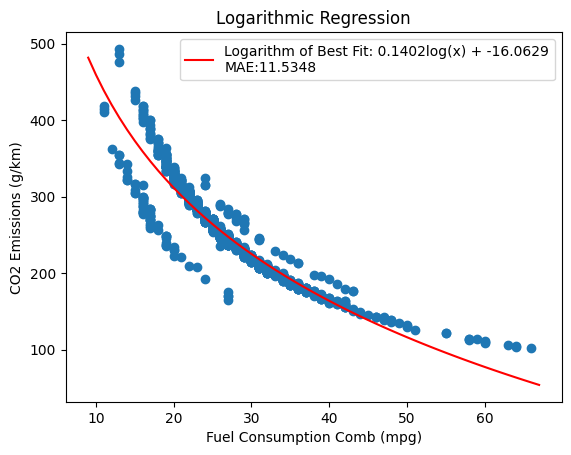

In [697]:
# Plot logarithmic regression model

plt.title("Logarithmic Regression")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.scatter(test_X, test_Y)

plot_X = range(min(test_X) - 2, max(test_X) + 2, 1)
plt.plot(plot_X, model_log(plot_X), label='Logarithm of Best Fit: ' + str(round(coef_poly[0], round_digit)) + 'log(x) + ' + str(round(coef_poly[1], round_digit)) + '\nMAE:' + str(round(mae_log, round_digit)), color='red',)

plt.legend()

# Readme

In [698]:
with open("README.md", "w", encoding='utf-8') as f:
    f.write("# CO2 Emissions Predictions using Regression\n")
    f.write("## Aaryan Patel CSC590 C Format\n\n")
    
    f.write('## Linear Regression:\n\n')
    
    f.write("### - Original Data\n\n")
    
    f.write(f"* \u03B2\u2080: {round(b_0, round_digit)}\n\n")
    f.write(f"* \u03B2\u2081: {round(b_1, round_digit)}\n\n")
    f.write(f"* Original MAE: {round(mae_original, round_digit)}\n\n")

    f.write("### - Normalized Data\n\n")

    f.write(f"* Normalized \u03B2\u2080: {round(norm_b_0, round_digit)}\n\n")
    f.write(f"* Normalized \u03B2\u2081: {round(norm_b_1, round_digit)}\n\n")
    f.write(f"* Normalized MAE: {round(mae_norm, round_digit)}\n\n")
    
    f.write("### - Standardized Data\n\n")
    
    f.write(f"* Standardized \u03B2\u2080: {round(std_b_0, round_digit)}\n\n")
    f.write(f"* Standardized \u03B2\u2081: {round(std_b_1, round_digit)}\n\n")
    f.write(f"* Standardized MAE: {round(mae_std, round_digit)}\n\n")
    
    f.write("## Polynomial Regression:\n\n")
    
    f.write(f"* \u03B1: {round(coef_poly[0], round_digit)}\n\n")
    f.write(f"* \u03B2: {round(coef_poly[1], round_digit)}\n\n")
    f.write(f"* \u03B3: {round(coef_poly[2], round_digit)}\n\n")
    f.write(f"* MAE: {round(mae_poly, round_digit)}\n\n")
    
    f.write("## Logarithmic Regression:\n\n")
    
    f.write(f"* \u03B1: {round(coef_log[0], round_digit)}\n\n")
    f.write(f"* \u03B2: {round(coef_log[1], round_digit)}\n\n")
    f.write(f"* MAE: {round(mae_log, round_digit)}\n\n")